In [1]:
from keras.models import Sequential
from keras.layers import Dense
# tensorflow에 기울기 계산했던 Adam 같은 역할
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [2]:
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ],
    dtype = "float32"
)
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [3]:
y = np.array([0, 0, 0, 1], dtype = "float32")
y

array([0., 0., 0., 1.], dtype=float32)

In [4]:
# 입력값을 읽어서 예측을 할 Sequential 객체 생성
model = Sequential()

In [12]:
# model에 데이터 분석 객체 추가

# Dense(1, input_dim = 2, activation = "sigmoid")
# Dense: 선형회귀를 수행할 객체
# Dense(출력데이터의 칸의 수): 출력데이터는 y이고, 칸의 수는 1이므로
# Dense(1)

# input_dim: 입력 데이터 칸의 수, 입력 데이터는 X이고, 칸의 수는 2 이므로 2

# Dense(1, input_dim = 2): 선형회귀를 할 객체를 생성
#                          출력 칸수는 1, 입력 칸수 2

# activation = "sigmoid": 선형회귀 후 sigmoid 함수를 활성 함수를 이용해서 0 ~ 1 사이값 return

# Dense 모델을 예측할 수 있도록 model에 추가
# model.add(Dense(1, input_dim = 2, activation = "sigmoid"))

model.add(Dense(1, input_dim = 2, activation = "sigmoid"))

# 파이썬 코드에서
# 예측값을 hypothesis에 대입하는 과정
# hypothesis = sigmoid(np.dot(X,w)+b) 와 동일

In [6]:
# 생성된 모델정보 출력
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
# GradientDecent를 이용해서 w와 b를 찾는 방법을 설정함
# loss = "categorical_crossentropy": -1/4 * (y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
# 위 식의 합이 최소가 되는 w와 b의 값을 찾음
# optimizer = Adam(lr = 0.1): learning rate를 0.1로 설정
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 0.1), metrics = ["acc"])

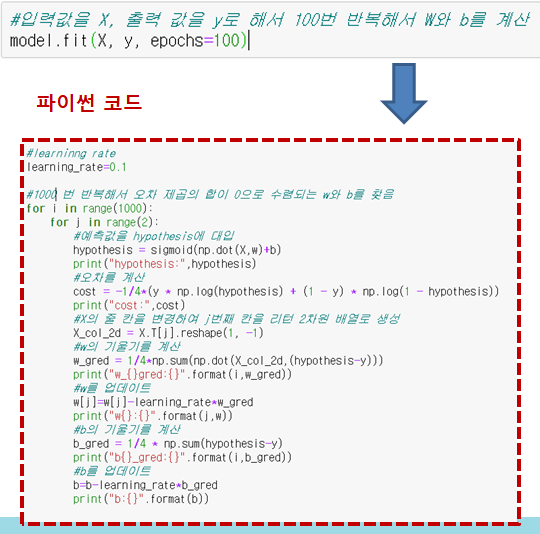

In [14]:
# 입력값을 X, 출력값을 y로 해서 100번 반복해서 w와 b를 계산
model.fit(X, y, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 55ms/step - loss: 0.8816 - acc: 0.7500
Epoch 2/100
4/4 [==============================] - 0s 497us/step - loss: 0.8571 - acc: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 748us/step - loss: 0.8294 - acc: 0.7500
Epoch 4/100
4/4 [==============================] - 0s 249us/step - loss: 0.7995 - acc: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 498us/step - loss: 0.7686 - acc: 0.7500
Epoch 6/100
4/4 [==============================] - 0s 748us/step - loss: 0.7374 - acc: 0.7500
Epoch 7/100
4/4 [==============================] - 0s 498us/step - loss: 0.7069 - acc: 0.7500
Epoch 8/100
4/4 [==============================] - 0s 1000us/step - loss: 0.6780 - acc: 0.7500
Epoch 9/100
4/4 [==============================] - 0s 996us/step - loss: 0.6518 - acc: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 499us/step - loss: 0.6290 - acc: 0.7500
Epoch 11/100
4/4 [==============================] - 0s 498u

Epoch 88/100
4/4 [==============================] - 0s 501us/step - loss: 0.4953 - acc: 0.7500
Epoch 89/100
4/4 [==============================] - 0s 250us/step - loss: 0.4752 - acc: 0.7500
Epoch 90/100
4/4 [==============================] - 0s 748us/step - loss: 0.4518 - acc: 0.7500
Epoch 91/100
4/4 [==============================] - 0s 748us/step - loss: 0.4272 - acc: 0.7500
Epoch 92/100
4/4 [==============================] - 0s 249us/step - loss: 0.4043 - acc: 0.7500
Epoch 93/100
4/4 [==============================] - 0s 499us/step - loss: 0.3849 - acc: 0.7500
Epoch 94/100
4/4 [==============================] - 0s 998us/step - loss: 0.3698 - acc: 1.0000
Epoch 95/100
4/4 [==============================] - 0s 996us/step - loss: 0.3581 - acc: 1.0000
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.3487 - acc: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 748us/step - loss: 0.3398 - acc: 1.0000
Epoch 98/100
4/4 [==============================] 

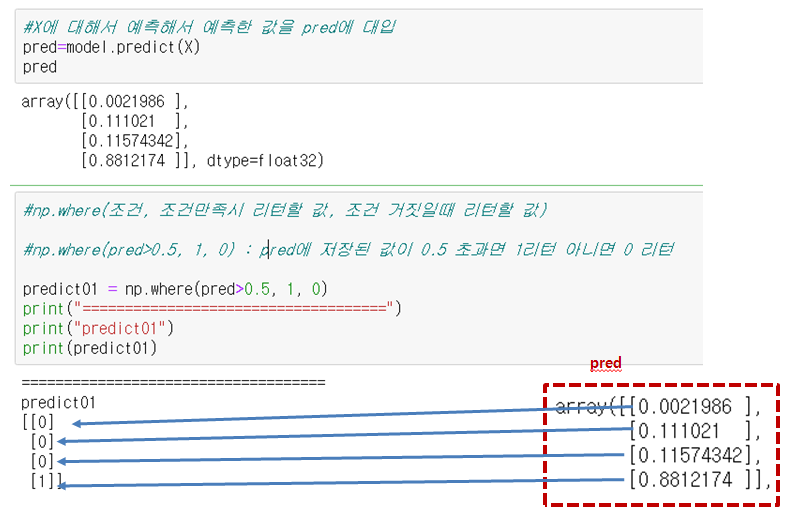

In [17]:
# X에 대해서 예측해서 예측한 값을 pred에 대입
pred = model.predict(X)
pred

array([[0.12959267],
       [0.22551714],
       [0.22606087],
       [0.5997973 ]], dtype=float32)

In [18]:
# np.where(조건, 조건 만족시 리턴할 값, 조건 거짓일 때 리턴할 값)

# np.where(pred > 0.5, 1, 0): pred에 저장된 값이 0.5 초과면 1 아니면 0 return

predict01 = np.where(pred > 0.5, 1, 0)
print("=" * 50)
print("predict01")
print(predict01)

predict01
[[0]
 [0]
 [0]
 [1]]


In [19]:
# predict01, flatten()
# predict01을 1차원 배열로 변환
predict02 = predict01.flatten()
predict02

array([0, 0, 0, 1])

In [20]:
# predict02 == y가 같으면 True 다르면 False return
predict03 = (predict02 == y)
predict03

array([ True,  True,  True,  True])

In [21]:
# True는 1로 False는 0으로 변환해서 합을 계산
np.sum(predict03)

4

In [22]:
# 정확도를 계산
acc = np.sum(predict03)/4
acc

1.0

In [23]:
# 0, 1의 and 연산 실행
arr = np.array([[0, 1]], dtype = "float32")
# sigmoid(arr*w+b)를 계산
pred = model.predict(arr)
pred

array([[0.22551714]], dtype=float32)

In [24]:
predict01 = np.where(pred > 0.5, 1, 0)
print("=" * 50)
print("predict01")
print(predict01)

predict01
[[0]]


In [25]:
# 1, 1의 and 연산 실행
arr = np.array([[1, 1]], dtype = "float32")
# sigmoid(arr*w+b)를 계산
pred = model.predict(arr)
pred

array([[0.5997973]], dtype=float32)

In [26]:
predict01 = np.where(pred > 0.5, 1, 0)
print("=" * 50)
print("predict01")
print(predict01)

predict01
[[1]]
